<a href="https://colab.research.google.com/github/Vanshika-30/ML-Project/blob/master/Bank_Personal_Loan_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importing Libraries

The retail marketing department to devise campaigns with better target marketing to increase success ratio with minimal budget. The department wants to build a model that will help them identify the potential customers who have higher probabilit  of purchasing the loan. This will increae the success ratio while at the same time reduce campaign cost.

Dataset contains 5000 customers.

The Bank Management has to build a new product- Personal Loan and run a campaign to sell it. After sometime 9% of the customers have Personal Loan form the bank.

### The Goal


*   To sell more Personal Loan 
*   To devise campaign to better target marketing to increase successs ratio with minimum budget.
*   To identify potential customers









In [244]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

In [245]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan.csv to Bank_Personal_Loan (2).csv


## 1.1 Loading Data into data frame 

In [246]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan.csv'])) 
df.head(5)  # display top 5 rows 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [247]:
df.tail(5)  # display last 5 rows 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### 1.2 Checking the types of Data and basic Summary Stats

Attribute Information:

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?

In [248]:
# displaying information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [249]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [250]:
df.shape

(5000, 14)

In [251]:
# to know the nuber of null values present in each column
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### 2. Dropping Irrelevant columns

Age and experience are found to be correlated, so we can drop the experience column and work only with age.
ID column has irrelevant data so it can be dropped.

In [252]:
experience = df['Experience']
age = df['Age']
experience.corr(age)

0.9942148569683321

In [253]:
df = df.drop(['ID', 'Experience'], axis=1)
df.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


### 3. EDA

In [254]:
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [255]:
df.nunique(dropna=True)

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

The above two values also show that the dataset doesn't have any unique values.

Zip Code has 467 distinct values and it is a nominal variable with too many levels. It's better to drop Zip Code.

In [256]:
df.drop('ZIP Code', axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [257]:
df.isnull().sum()

Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [258]:
# Number of people having 0 Mortgage
(df.Mortgage == 0).sum()

3462

In [259]:
# Number of people having Average Credit Card spending 0
(df.CCAvg == 0).sum()

106

In [260]:
# Value Counts of various features 
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())
    print("\n")

---- Age ---
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64


---- Income ---
44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64


---- ZIP Code ---
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64


---- Family ---
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


---- CCAvg ---
0.30    241
1.00    231
0.20    204
2.

### Univariate Analysis

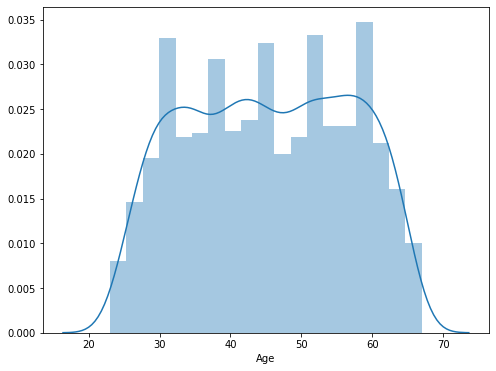

In [261]:
# Almost symmetrical distribution
sns.distplot(df.Age)

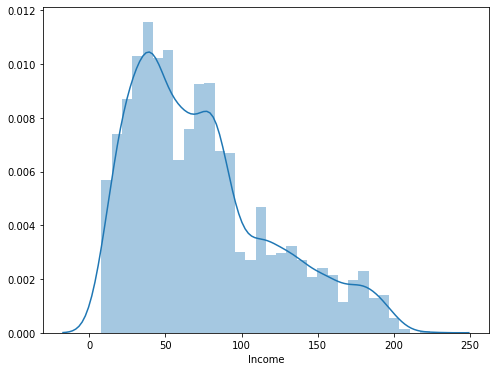

In [262]:
# Right Skewed distribution
sns.distplot(df.Income)

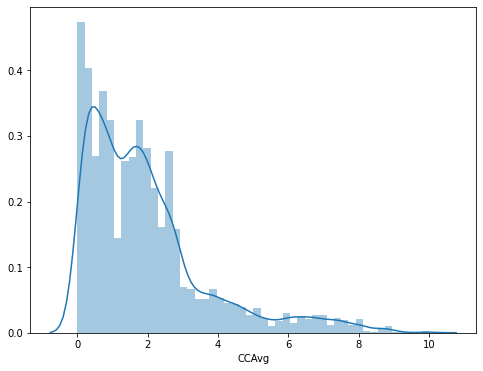

In [263]:
# Right Skewed distribution
sns.distplot(df.CCAvg)

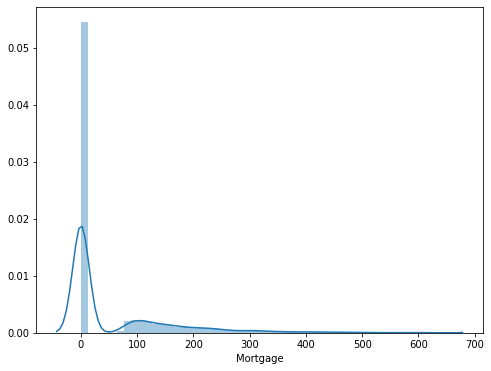

In [264]:
# Right Skewed distribution
sns.distplot(df.Mortgage)

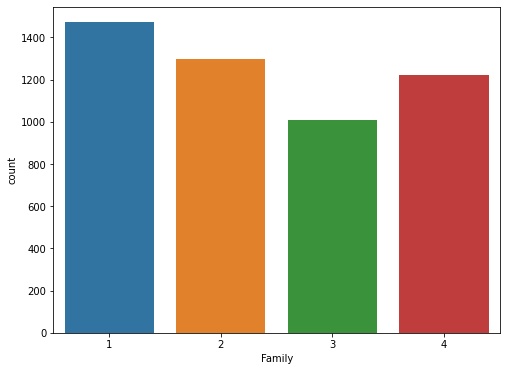

In [265]:
sns.countplot(df.Family)

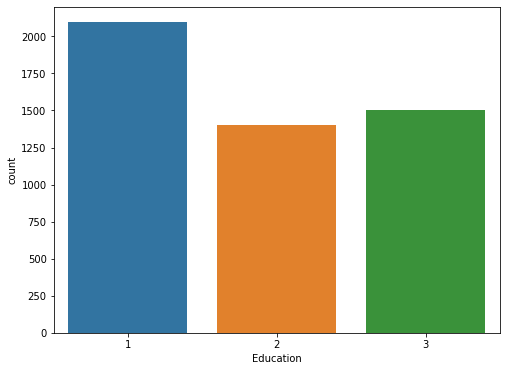

In [266]:
sns.countplot(df.Education)

### Multivariate Analysis

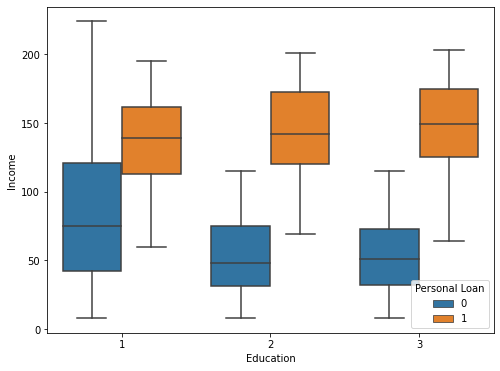

In [267]:
sns.boxplot(x='Education', y ='Income', hue='Personal Loan', data=df)

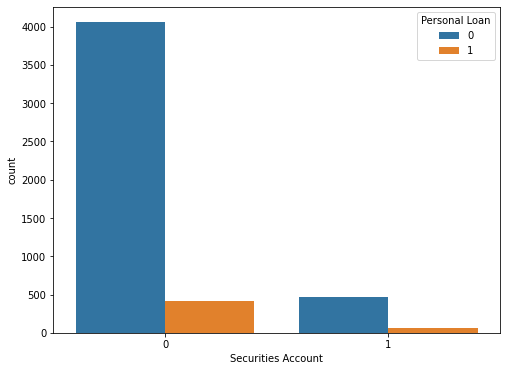

In [268]:
sns.countplot(x='Securities Account', data=df, hue='Personal Loan')

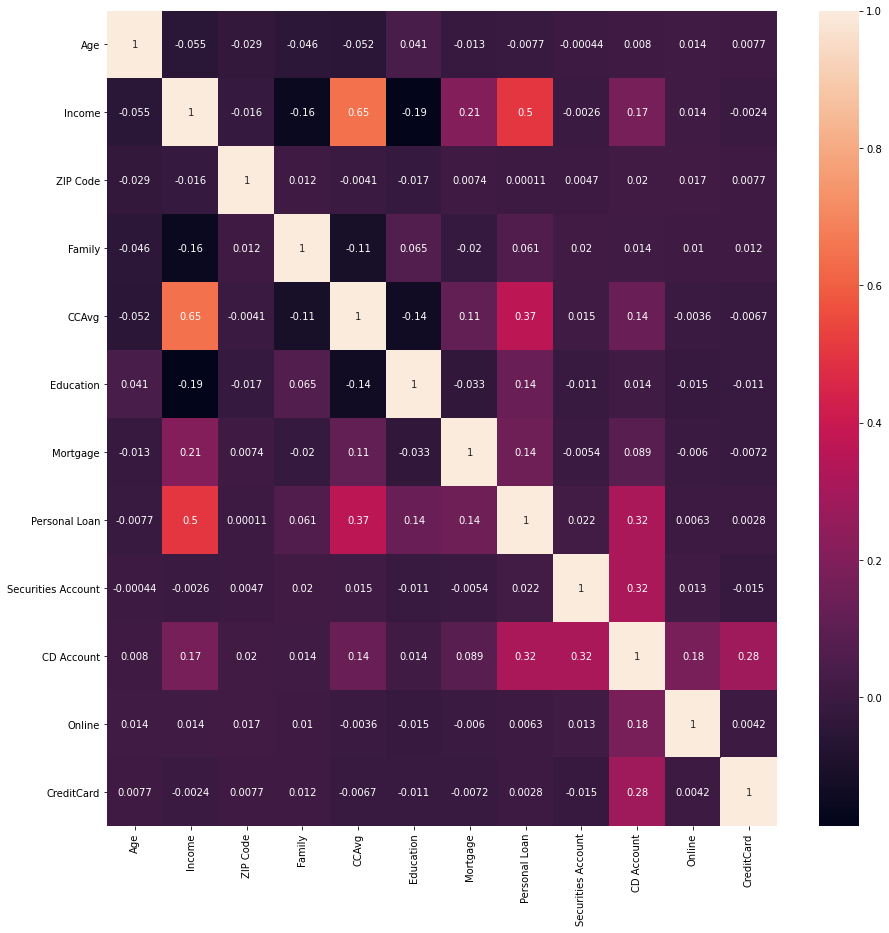

In [269]:
fig,ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), annot=True)
# Credit card avg and income are highly correlated as compared to rest

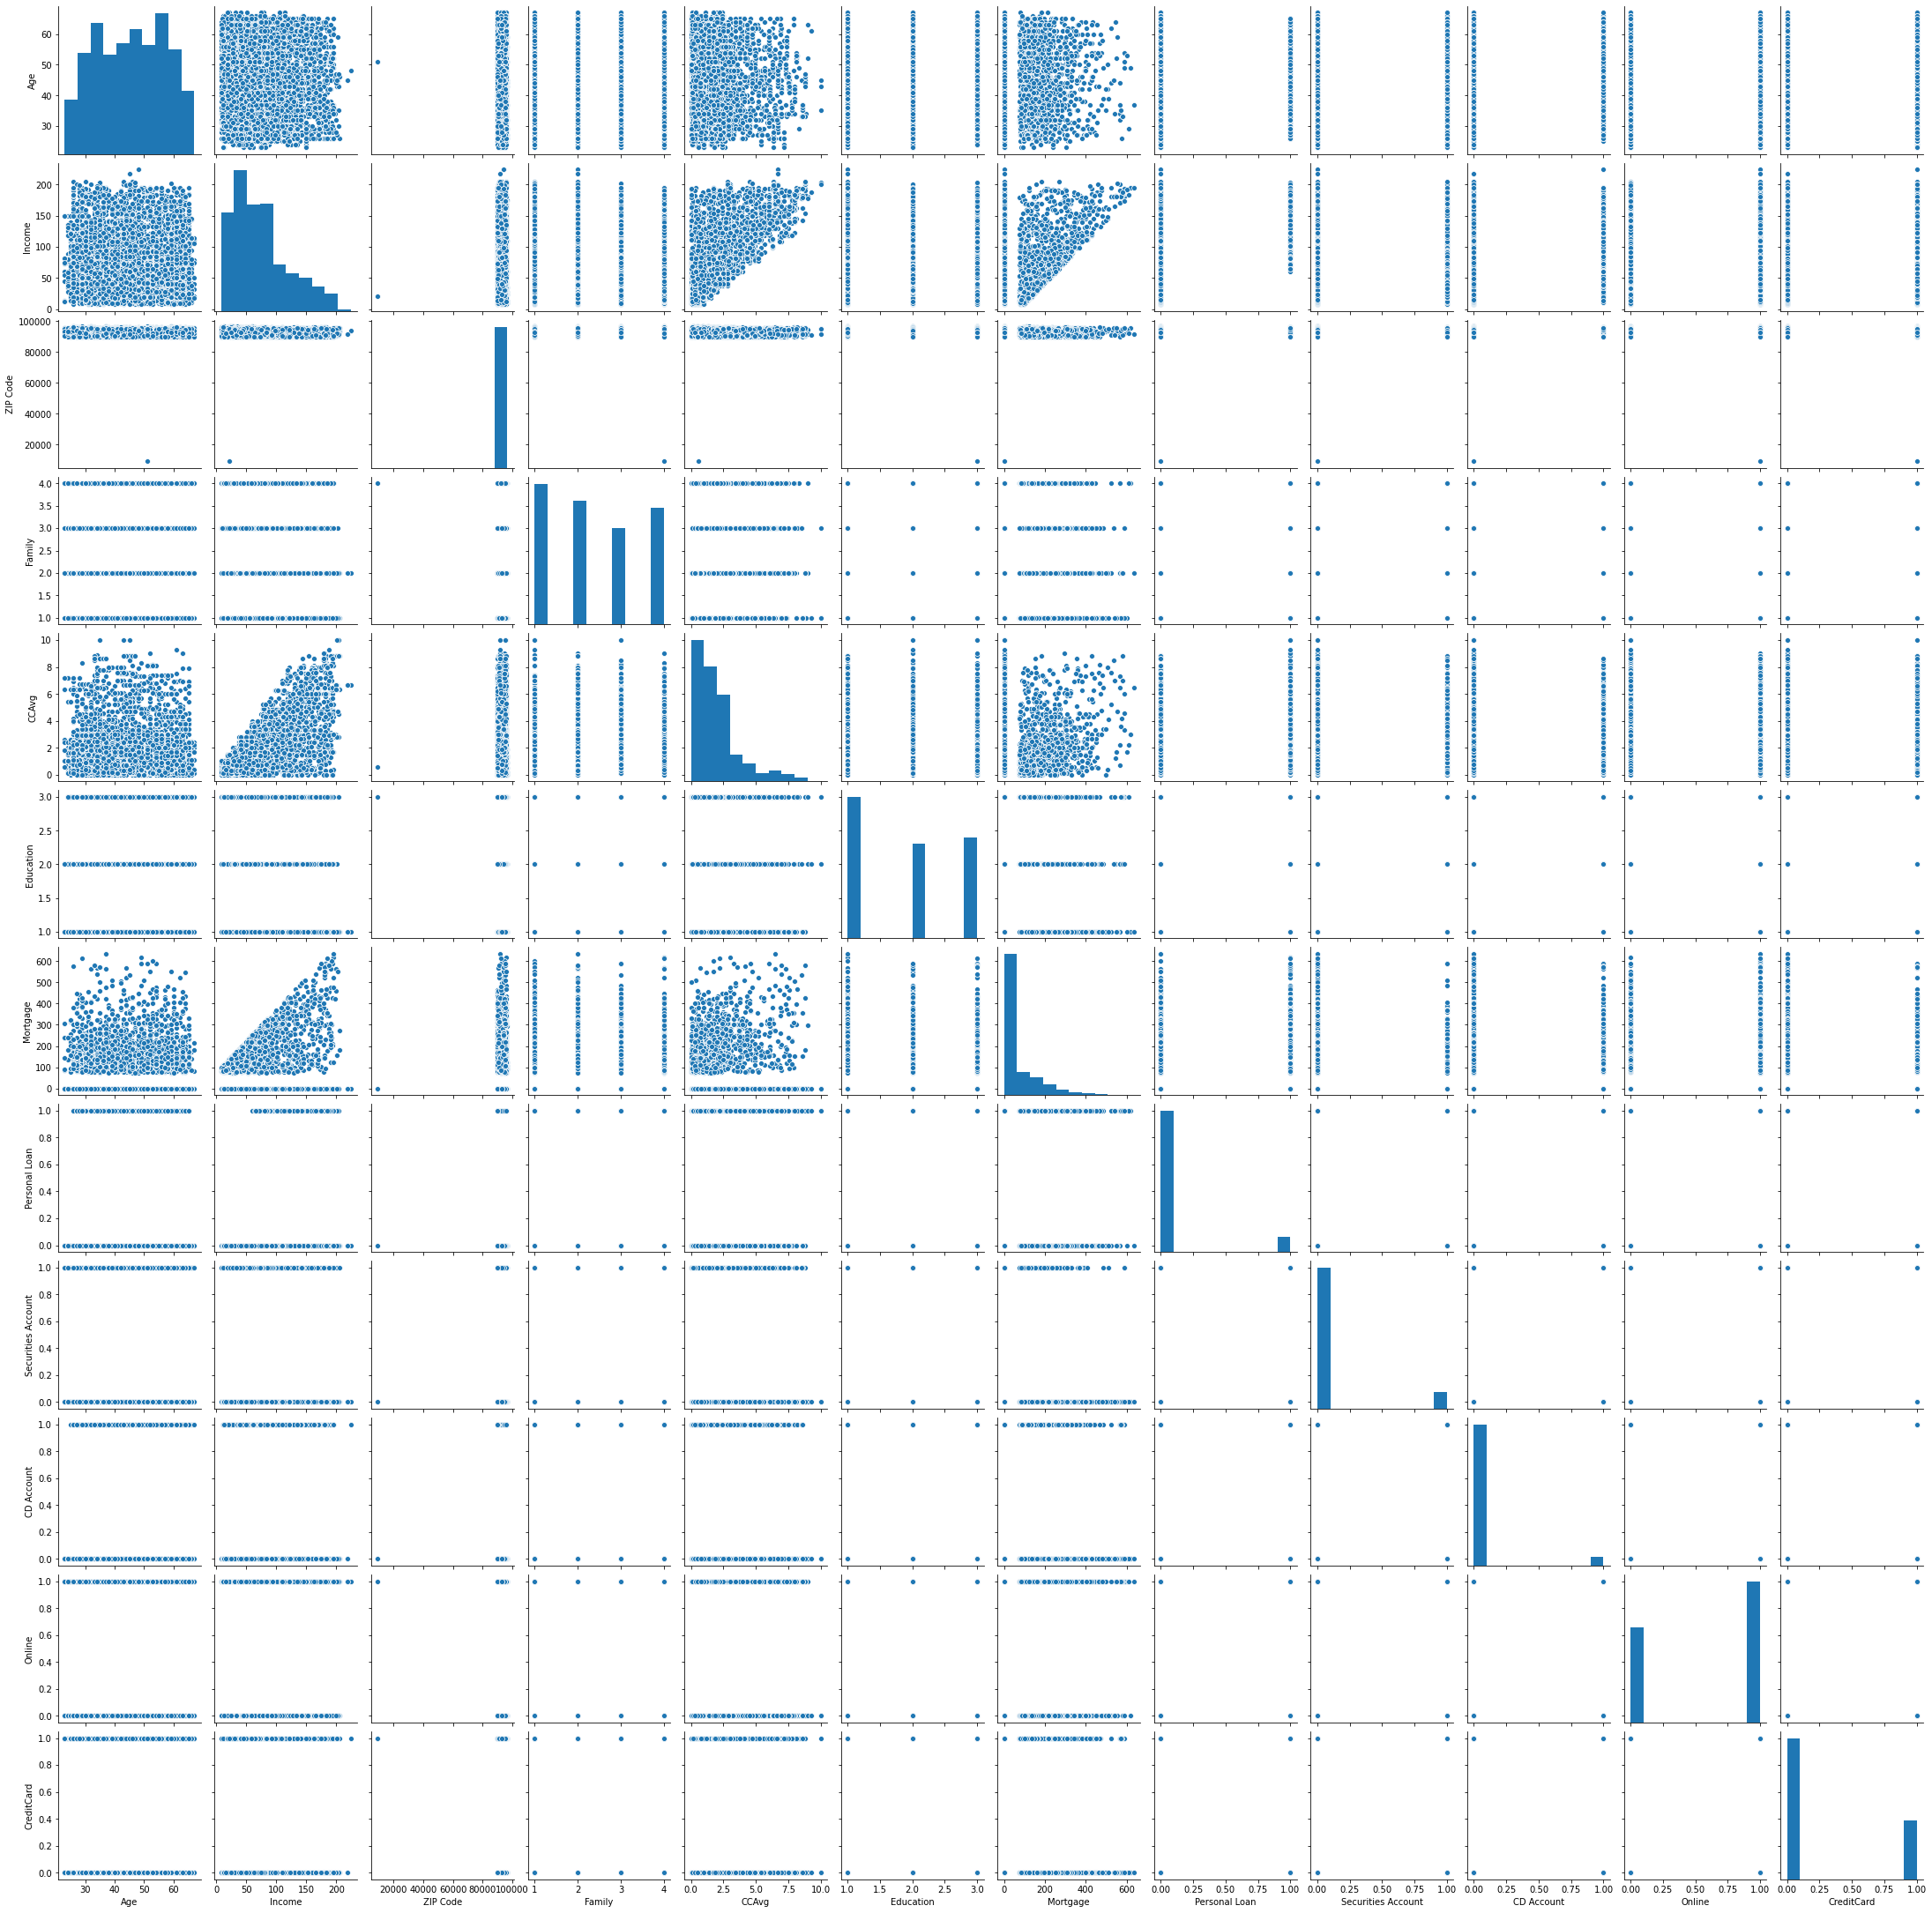

In [270]:
g=sns.pairplot(df)

In [271]:
# Splitting data
data_X = df.loc[:, df.columns != "Personal Loan"]
data_Y = df[['Personal Loan']]

### 4. Transformation of Feature Variables

Transforming Income, CCAvg and Mortgage to make the distribution more symmetirc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


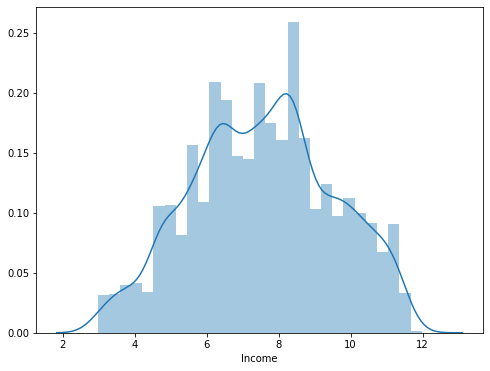

In [272]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data_X['Income'].values.reshape(-1,1))
temp = pt.transform(data_X['Income'].values.reshape(-1,1))
data_X['Income'] = temp
sns.distplot(data_X['Income'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


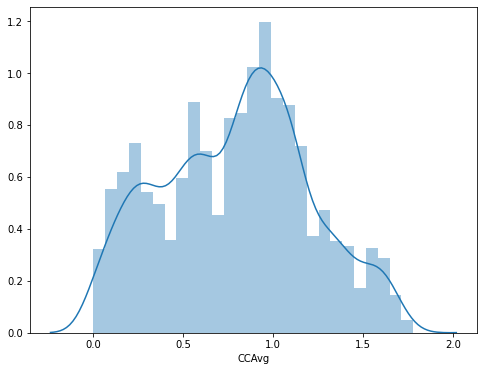

In [273]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data_X['CCAvg'].values.reshape(-1,1))
temp = pt.transform(data_X['CCAvg'].values.reshape(-1,1))
data_X['CCAvg'] = temp
sns.distplot(data_X['CCAvg'])

In [274]:
data_X['Mortgage_Int'] = pd.cut(data_X["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)
data_X.drop("Mortgage", axis=1, inplace=True)
# Label Encoding done

In [275]:
print(data_Y.shape)
print(data_X.shape)

(5000, 1)
(5000, 11)


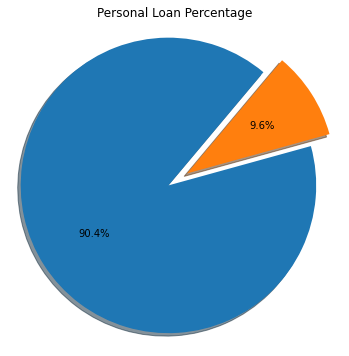

In [276]:
# Univariate Analysis
# 9.6% of all applicants get approved for personal loan

tempDf = pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
tempDf.columns = ['Labels', 'Personal Loan']
fig1, ax1 = plt.subplots(figsize=(6,6))
explode = (0,0.15)
ax1.pie(tempDf["Personal Loan"], explode=explode, autopct='%1.1f%%',startangle=50, shadow=True)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()

## 5. Splitting the Data using Stratified Sampling

Importing necessary models and preparing the data

In [277]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3, stratify=data_Y, random_state=0)

In [278]:
train_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [279]:
train_x.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,51,5.058173,94301,3,0.322049,1,0,0,1,1,0
1,64,5.948841,90266,1,0.814478,2,1,0,0,0,0
2,52,5.651776,94923,4,0.902279,1,0,0,1,1,0
3,32,4.661500,93106,1,0.384645,3,0,0,1,0,1
4,62,7.097040,91320,1,0.544710,1,1,0,0,1,0


## 6. Fitting the data into different models and Analysing the output

Scaling the data to get mean value 0 and standard deviation of 1, to avoid huge difference in value of the data

In [ ]:
from sklearn.preprocessing import StandardScaler

for ind, column in enumerate(train_x.columns):
  scaler = StandardScaler()

  # fitting the data
  scaler.fit(train_x[[column]])

  np_array = scaler.transform(train_x[[column]])
  train_x.loc[:, column] = pd.Series(np_array.flatten())

  np_array = scaler.transform(test_x[[column]])
  test_x.loc[:, column] = pd.Series(np_array.flatten())

In [315]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

np_train_x = train_x.values
np_train_y = train_y.values
np_test_x = test_x.values
np_test_y = test_y.values

In [316]:
# Default function for printing Confusion Matrix
def confusion_matrix_draw(actual, predicted):
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
  plt.ylabel("Observed")
  plt.xlabel("Predicted")
  plt.tight_layout()
  plt.title('Confusion matrix')

### Naive Bayes

In [317]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Train the model using the training sets
nb = nb.fit(np_train_x, np_train_y.ravel())

#Predict the response for test dataset
y_test_pred = nb.predict(np_test_x)
y_train_pred = nb.predict(np_train_x)

train_acc = accuracy_score(np_train_y, y_train_pred)
test_acc = accuracy_score(np_test_y, y_test_pred)

print("Train Accuracy: {:.5f}".format(train_acc))
print("Test Accuracy: {:.5f}".format(test_acc))
print("Recall: ", recall_score(np_test_y, y_test_pred))
print("Precision: ", precision_score(np_test_y, y_test_pred))
print("F1 Score: ", f1_score(np_test_y, y_test_pred))
print("ROC Accurarcy Score: ", roc_auc_score(np_test_y, y_test_pred))

Train Accuracy: 0.91057
Test Accuracy: 0.91533
Recall:  0.5486111111111112
Precision:  0.5602836879432624
F1 Score:  0.5543859649122808
ROC Accurarcy Score:  0.7514441986234022


In [318]:
print(classification_report(np_test_y, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1356
           1       0.56      0.55      0.55       144

    accuracy                           0.92      1500
   macro avg       0.76      0.75      0.75      1500
weighted avg       0.91      0.92      0.91      1500



Naive Bayes gives an accurarcy of 92%

In [319]:
cnf_matrix = confusion_matrix(np_test_y, y_test_pred)
cnf_matrix

array([[1294,   62],
       [  65,   79]])

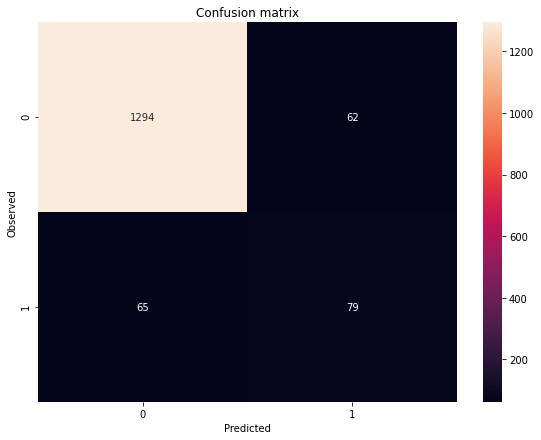

In [320]:
confusion_matrix_draw(np_test_y, y_test_pred)

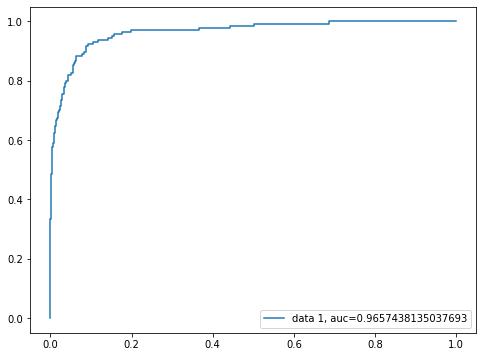

In [321]:
y_pred_proba = logreg.predict_proba(np_test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(np_test_y,  y_pred_proba)
auc = metrics.roc_auc_score(test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Logistic Regression

In [322]:
# Using Logestic Regression, we get an accurarcy of 95.2% for training data and 95.13 for Test data
logreg = LogisticRegression(random_state=0)
logreg.fit(np_train_x, np_train_y.ravel())

y_test_pred = logreg.predict(np_test_x)
y_train_pred = logreg.predict(np_train_x)

train_acc = accuracy_score(np_train_y, y_train_pred)
test_acc = accuracy_score(np_test_y, y_test_pred)

print("Train Accuracy: {:.5f}".format(train_acc))
print("Test Accuracy: {:.5f}".format(test_acc))
print("Recall: ", recall_score(np_test_y, y_test_pred))
print("Precision: ", precision_score(np_test_y, y_test_pred))
print("F1 Score: ", f1_score(np_test_y, y_test_pred))
print("ROC Accurarcy Score: ", roc_auc_score(np_test_y, y_test_pred))

Train Accuracy: 0.95686
Test Accuracy: 0.95467
Recall:  0.6527777777777778
Precision:  0.8392857142857143
F1 Score:  0.734375
ROC Accurarcy Score:  0.819751720747296


In [323]:
from sklearn.metrics import classification_report
print(classification_report(np_test_y, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.84      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



The accurarcy score using Logistic Regression is 95% as compared with 92% for Naive Bayes. So we can say that Logistic Regression performs better.

In [324]:
cnf_matrix = confusion_matrix(np_test_y, y_test_pred)
cnf_matrix

array([[1338,   18],
       [  50,   94]])

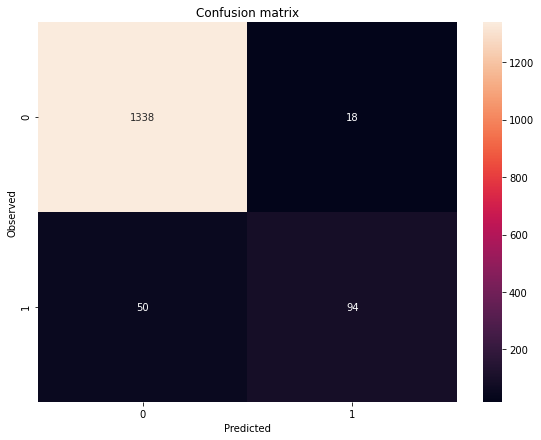

In [325]:
confusion_matrix_draw(np_test_y, y_test_pred)

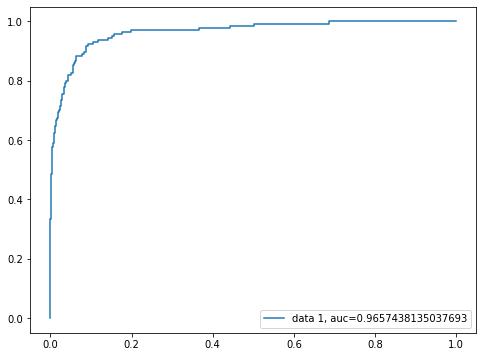

In [326]:
y_pred_proba = logreg.predict_proba(np_test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(np_test_y,  y_pred_proba)
auc = metrics.roc_auc_score(test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### K-Neighbors Classifier

In [327]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(np_train_x,np_train_y.ravel())

#Predict the response for test dataset
y_test_pred = knn.predict(np_test_x)
y_train_pred = knn.predict(np_train_x)

train_acc = accuracy_score(np_train_y, y_train_pred)
test_acc = accuracy_score(np_test_y, y_test_pred)

print("Train Accuracy: {:.5f}".format(train_acc))
print("Test Accuracy: {:.5f}".format(test_acc))
print("Recall: ", recall_score(np_test_y, y_test_pred))
print("Precision: ", precision_score(np_test_y, y_test_pred))
print("F1 Score: ", f1_score(np_test_y, y_test_pred))
print("ROC Accurarcy Score: ", roc_auc_score(np_test_y, y_test_pred))

Train Accuracy: 0.97371
Test Accuracy: 0.96400
Recall:  0.6875
Precision:  0.9166666666666666
F1 Score:  0.7857142857142857
ROC Accurarcy Score:  0.8404314159292036


In [328]:
print(classification_report(np_test_y, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.92      0.69      0.79       144

    accuracy                           0.96      1500
   macro avg       0.94      0.84      0.88      1500
weighted avg       0.96      0.96      0.96      1500



The accurarcy score using K Neighbours Classifier is 96% as compared with 95% for Logistic Regression. So we can say that K Neighbor Classifier performs better.

In [329]:
cnf_matrix = confusion_matrix(np_test_y, y_test_pred)
cnf_matrix

array([[1347,    9],
       [  45,   99]])

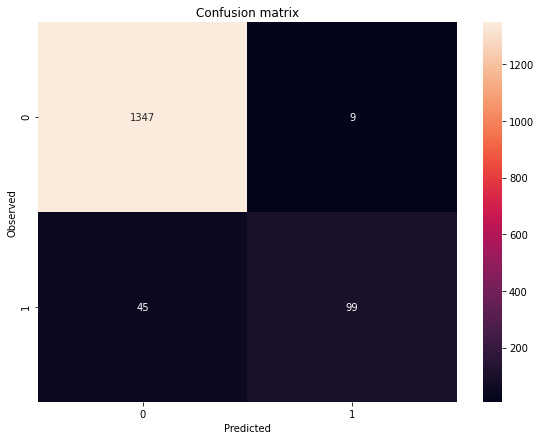

In [330]:
confusion_matrix_draw(np_test_y, y_test_pred)

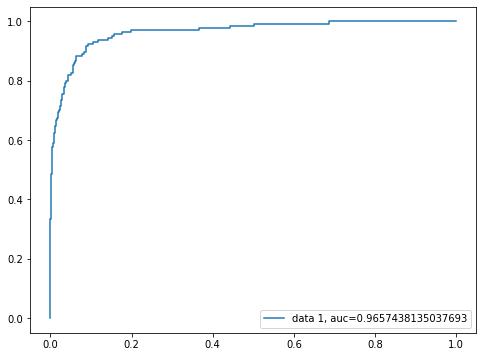

In [331]:
y_pred_proba = logreg.predict_proba(np_test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(np_test_y,  y_pred_proba)
auc = metrics.roc_auc_score(test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Decision Tree Classifier

In [332]:
# Train Decision Tree Classifer

clf = DecisionTreeClassifier(random_state=0, max_depth=8)
clf = clf.fit(np_train_x, np_train_y.ravel())

#Predict the response for test dataset
y_test_pred = clf.predict(np_test_x)
y_train_pred = clf.predict(np_train_x)

train_acc = accuracy_score(np_train_y, y_train_pred)
test_acc = accuracy_score(np_test_y, y_test_pred)

print("Train Accuracy: {:.5f}".format(train_acc))
print("Test Accuracy: {:.5f}".format(test_acc))
print("Recall: ", recall_score(np_test_y, y_test_pred))
print("Precision: ", precision_score(np_test_y, y_test_pred))
print("F1 Score: ", f1_score(np_test_y, y_test_pred))
print("ROC Accurarcy Score: ", roc_auc_score(np_test_y, y_test_pred))

Train Accuracy: 0.99600
Test Accuracy: 0.98000
Recall:  0.875
Precision:  0.9130434782608695
F1 Score:  0.8936170212765957
ROC Accurarcy Score:  0.933075221238938


In [333]:
print(classification_report(np_test_y, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.88      0.89       144

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



The accurarcy score using is Decision Tree 98% as compared with 96% for K Neighbours Classifier . So we can say that Decision Tree performs better.

In [334]:
cnf_matrix = confusion_matrix(np_test_y, y_test_pred)
cnf_matrix

array([[1344,   12],
       [  18,  126]])

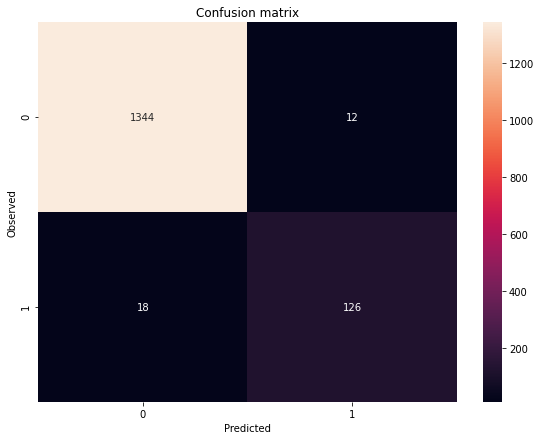

In [335]:
confusion_matrix_draw(np_test_y, y_test_pred)

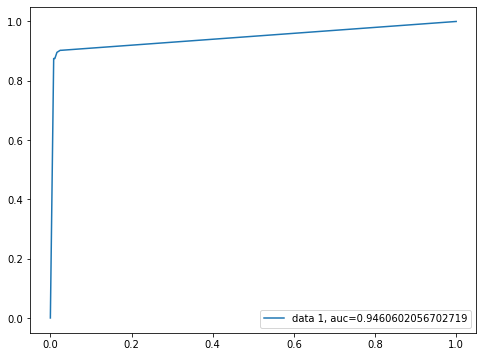

In [336]:
y_pred_proba = clf.predict_proba(np_test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(np_test_y,  y_pred_proba)
auc = metrics.roc_auc_score(np_test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

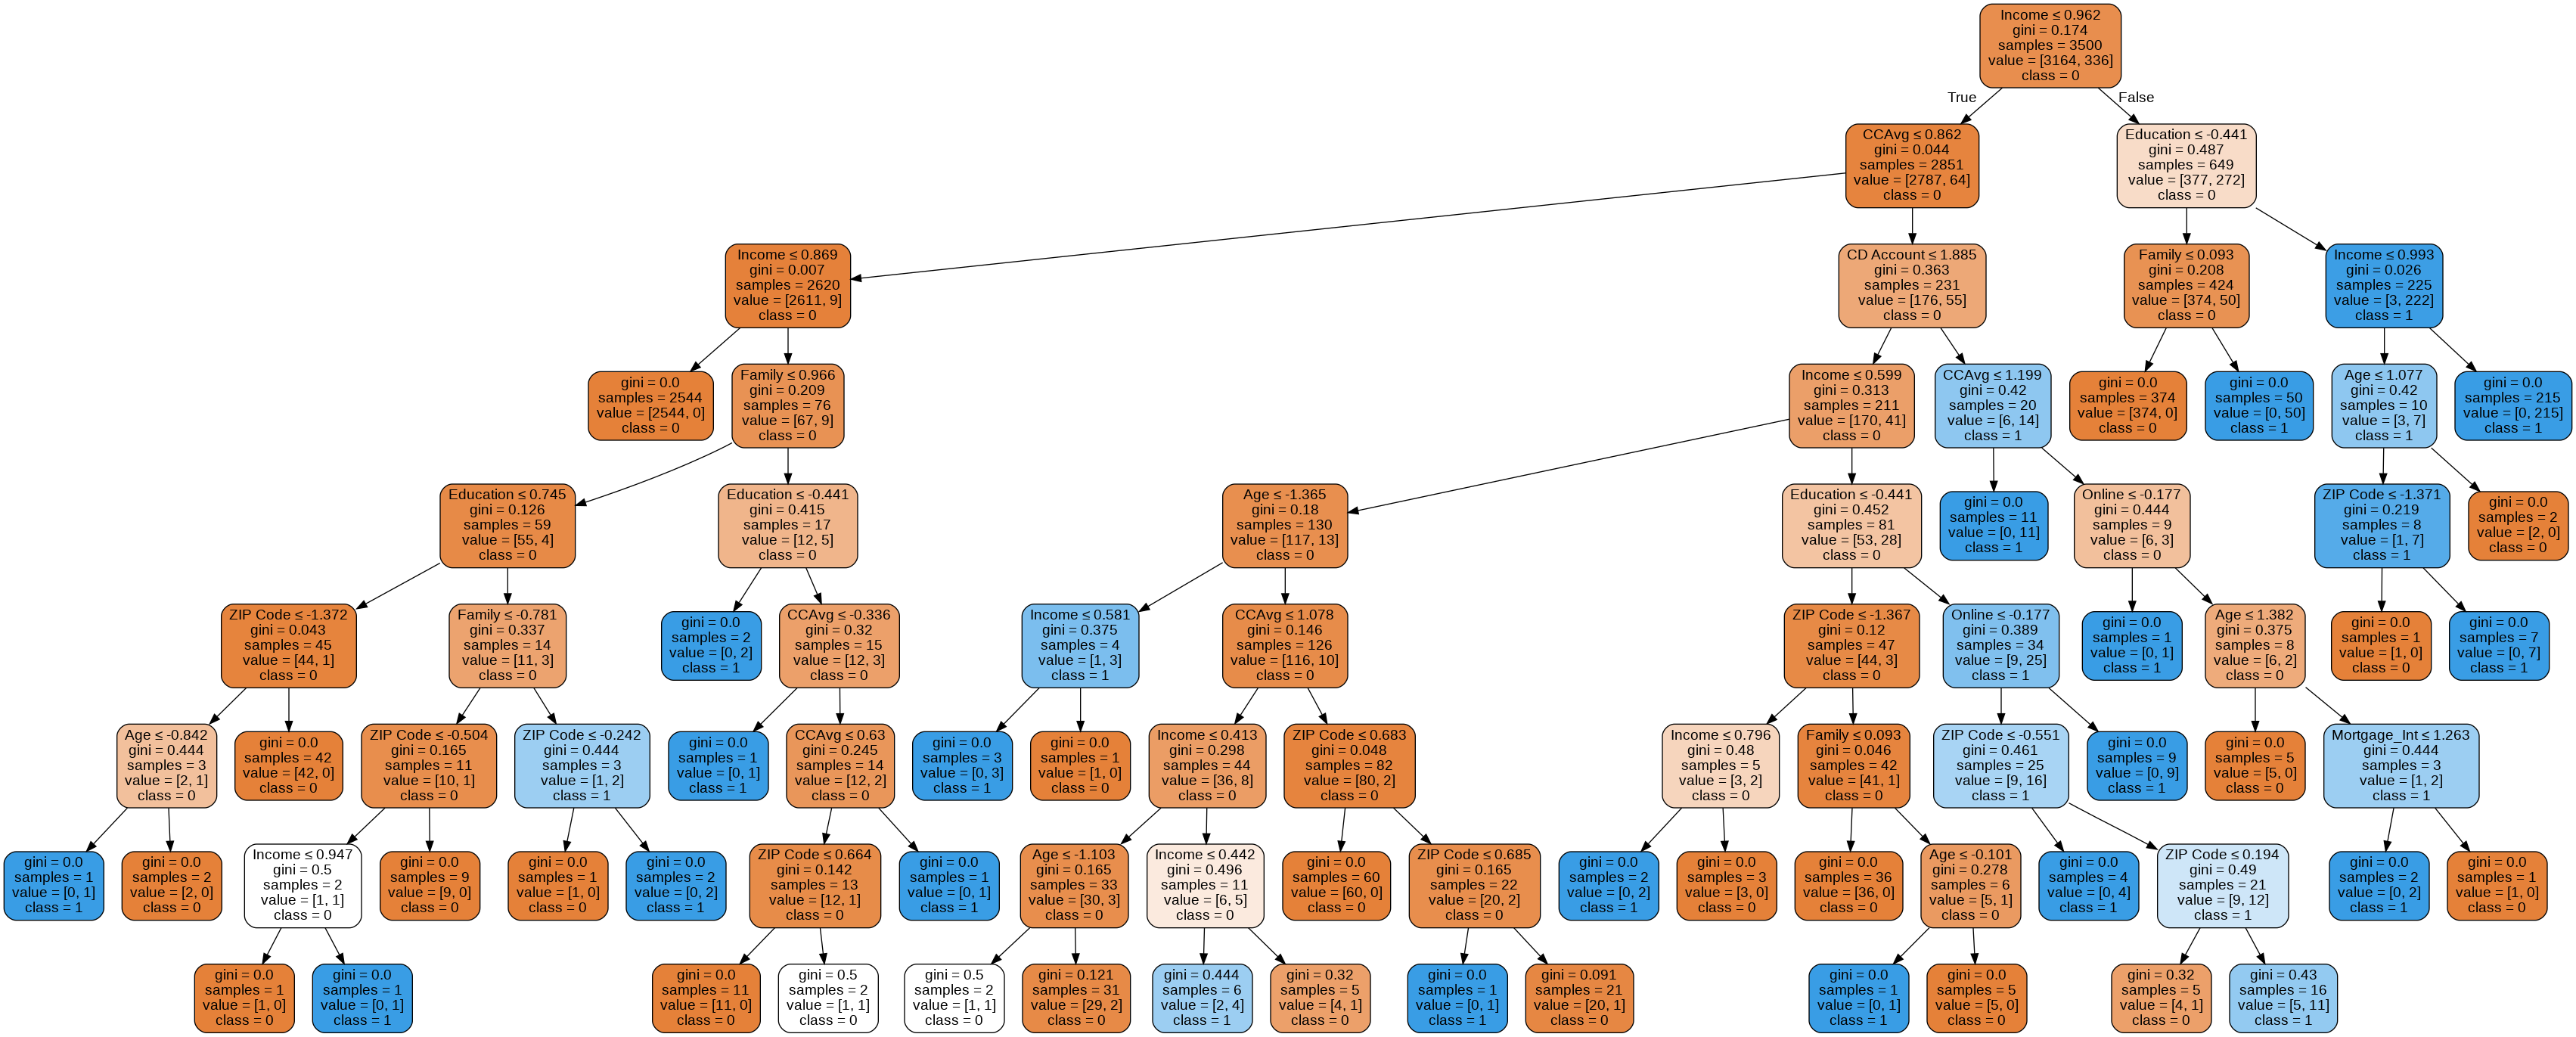

In [337]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('loan.png')
Image(graph.create_png())

### Random Forest Classifier

In [338]:
# Random Forest Classifier

rfc=RandomForestClassifier(random_state=0, n_estimators=500, max_depth=8)

rfc = rfc.fit(np_train_x, np_train_y.ravel())

#Predict the response for test dataset
y_test_pred = rfc.predict(np_test_x)
y_train_pred = rfc.predict(np_train_x)

train_acc = accuracy_score(np_train_y, y_train_pred)
test_acc = accuracy_score(np_test_y, y_test_pred)

print("Train Accuracy: {:.5f}".format(train_acc))
print("Test Accuracy: {:.5f}".format(test_acc))
print("Recall: ", recall_score(np_test_y, y_test_pred))
print("Precision: ", precision_score(np_test_y, y_test_pred))
print("F1 Score: ", f1_score(np_test_y, y_test_pred))
print("ROC Accurarcy Score: ", roc_auc_score(np_test_y, y_test_pred))

Train Accuracy: 0.99486
Test Accuracy: 0.98800
Recall:  0.8888888888888888
Precision:  0.9846153846153847
F1 Score:  0.9343065693430657
ROC Accurarcy Score:  0.9437069813176008


In [339]:
cnf_matrix = confusion_matrix(np_test_y, y_test_pred)
cnf_matrix

array([[1354,    2],
       [  16,  128]])

In [344]:
print(classification_report(np_test_y, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.89      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



The accurarcy score using is Random Forest 99% as compared with 98% for Decision Tree . So we can say that Random Forest performs better.

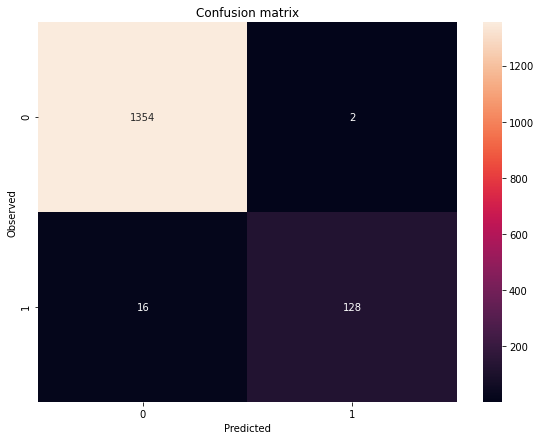

In [343]:
confusion_matrix_draw(np_test_y, y_test_pred)

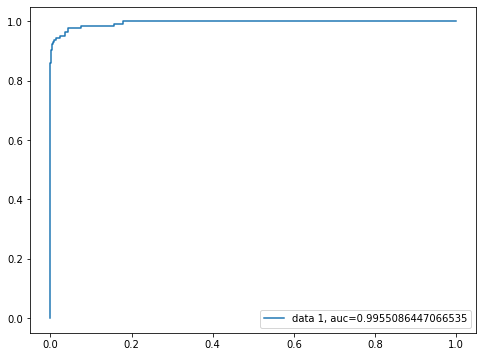

In [342]:
y_pred_proba = rfc.predict_proba(np_test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(np_test_y,  y_pred_proba)
auc = metrics.roc_auc_score(np_test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Conclusion

In the first step we imported various libraries and data.

1. The model is used to predict whether a person will take personal loan or not.
2. Age and experience are found to be correlated.
3. ID and ZIP Code didn't contribute as a valid feature for personal loan so it was dropped.
4. Income and CCAvg column were right skewed so Yeo-Johnson power transformation was used to normalize the data.
5. Mortgage was normalized using binning.

Output from several models was compared and predictions were made.


---
---



NAIVE BAYES

Accurarcy: 92%

Confusion Matrix:
                    [1294, 62],
                    [65, 79]
      
---
---

LOGISTIC REGRESSION

Accurarcy: 95%

Confusion Matrix:
                    [1338,   18],
       [  50,   94]
      
---
---

K NEIGHBOURS CLASSIFIER

Accurarcy: 96%

Confusion Matrix:
                   [1347,    9],
       [  45,   99]
      
---
---
DECISION TREE

Accurarcy: 98%

Confusion Matrix:
                    [1344,   12],
       [  18,  126]
      
---
---

RANDOM FOREST

Accurarcy: 99%

Confusion Matrix:
                    [1354,    2],
       [  16,  128]
      
---
---




Form the above results we can say that Random Forest classifies the data best and can be used to predict the likelihood of a liability customer buyng personal loan best. 